# HSE Salary Prediction EDA

### Reduce Cost of Job Offer Rejections by HSE Candidates

__author__ = "Daniel Hershberger"
__copyright__ = "Copyright 2019, Pentafusion"
__email__ = "dh@pentafusion.com"

## Table of Contents

### Data Integrity Check
- [Import Packages](#importpackages)
- [Load Data](#loaddata)
- [Data Inspection](#datainspection)
- [Missing Values and Duplicates](#missingvaluesandduplicates)

### Exploratory Data Analysis
- [Summary Statistics](#summarystatistics)
- [Examine Outliers](#examineoutliers)
- [Remove Outliers](#removeoutliers)
- [Visualize Feature Importance](#vizualizefeatureimportance)
- [Explore Data Relationships with the Correlation Matrix](#correlationmatrix)

### Conclusion
- [Final Thoughts](#finalthoughts)

# Data Integrity Check:
***

<a id='importpackages'></a>
## Import Packages

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#move working directory to correct location
os.chdir('/Users/HershHouse11/Desktop/GIT/salarypredictionproject')

<a id='loaddata'></a>
## Load Data

In [3]:
#Read the csv files and store datasets into a dataframes
train_feature_df = pd.read_csv('data/train_features_sp.csv')
train_target_df = pd.read_csv('data/train_salaries_sp.csv')
test_feature_df = pd.read_csv('data/test_features_sp.csv')

<a id='datainspection'></a>
## Data Inspection

In [4]:
# Examine the train_feature dataset
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
# Examine the train_target dataset
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


- The train_feature and test_feature datasets contain the same features.  That's a thumbs up to move forward!

In [6]:
# Examine the train_target dataset
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


- The jobId field is unique for each record.  This means it lacks any signal and will be dropped from training.

In [7]:
#Check size of data set and datatypes
print('Train Feature Info:')
train_feature_df.info()
print('___________________')
print('Train Target Info:')
train_target_df.info()
print('___________________')
print('Test Feature Info:')
test_feature_df.info()
print('___________________')

Train Feature Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
___________________
Train Target Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
___________________
Test Feature Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  100

- 1M records in each dataset with 8 columns (6 strings & 2 numeric).  Data types appear to be correctly assigned for each column.

<a id='missingvaluesandduplicates'></a>
## Missing Values and Duplicates

In [8]:
#Check train_feature dataset for missing values
print('Train_Feature Missing Values:')
train_feature_df.isnull().any()
#train_feature_df.isnull().sum()/len(train_feature_df)
#num_null_val_0 = train_feature_df.isnull().sum().sort_values(ascending=False).head()
#num_null_val_0

Train_Feature Missing Values:


jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [9]:
#Check train_target dataset for missing values
print('Train_Target Missing Values:')
train_target_df.isnull().any()
#train_target_df.isnull().sum()/len(train_target_df)
#num_null_val_1 = train_target_df.isnull().sum().sort_values(ascending=False).head()
#num_null_val_1

Train_Target Missing Values:


jobId     False
salary    False
dtype: bool

In [10]:
#Check test_feature dataset for missing values
print('Test_Feature Missing Values:')
test_feature_df.isnull().any()
#test_feature_df.isnull().sum()/len(test_feature_df)
#num_null_val_2 = test_feature_df.isnull().sum().sort_values(ascending=False).head()
#num_null_val_2

Test_Feature Missing Values:


jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [11]:
#Check train_feature dataset for duplicates
print('Train_Feature Duplicates:')
train_feature_df.duplicated().sum()

Train_Feature Duplicates:


0

In [12]:
#Check train_target dataset for duplicates
print('Train_Target Duplicates:')
train_target_df.duplicated().sum()

Train_Target Duplicates:


0

In [13]:
#Check test_feature dataset for duplicates
print('Test_Feature Duplicates:')
test_feature_df.duplicated().sum()

Test_Feature Duplicates:


0

- There are no missing values or duplicates.  This is a clean dataset of job postings and salaries.


# Exploratory Data Analysis:
***

<a id='summarystatistics'></a>
## Summary Statistics

In [14]:
# Separate categorical and numerical variables for analysis
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [15]:
numeric_cols = train_feature_df.select_dtypes(exclude='object')
categorical_cols = train_feature_df.select_dtypes(exclude=['int64', 'float64'])
print('The numeric columns are {}.'.format(numeric_cols.columns))
print('The categorical columns are {}.'.format(categorical_cols.columns))

The numeric columns are Index(['yearsExperience', 'milesFromMetropolis'], dtype='object').
The categorical columns are Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'], dtype='object').


In [16]:
#Examine the summary statistics for the numeric features
train_feature_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [17]:
#Examine the summary statistics for the categorical features
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684882723,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [18]:
# let's look at the cardinality of all features
train_feature_df.nunique().sort_values(ascending=False)

jobId                  1000000
milesFromMetropolis        100
companyId                   63
yearsExperience             25
major                        9
jobType                      8
industry                     7
degree                       5
dtype: int64

In [19]:
#Examine the summary statistics for the target variable
train_target_df.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


- For numeric features, yearsExperience ranges between 0 to 24 years with an average of 12.0 years. The milesFromMetropolis ranges between 0 to 99 miles with an average of 49.5 miles.  
- For categorical features, HIGH_SCHOOL is the most common degree and WEB is the most common industry.  
- The average salary of 116.1k USD with std of 38.7k USD which indicates there is a good amount of spread in the data.  
- The minimum of salary is 0 USD which indicates there is missing data or un-paid volunteers.  
- In the next step, I will merge the features and targets together into a single dataframe for further analysis.

In [20]:
#Merge features and targets into a single dataframe (option to delete original dataframes if necessary)
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')
#del train_feature_df
#del train_target_df

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [22]:
#Examine the summary statistics for the merged dataframe
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


- 1M records were retained in this dataframe after the merge, so this inner join on jobID was successful.  There are no orphan records.

In [23]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [24]:
# Median salary by Job Type
train_df.groupby(['jobType'])['yearsExperience', 'salary'].mean()

,yearsExperience,salary
jobType,,
CEO,11.998269,145.311425
CFO,11.990440,135.458547
CTO,12.010812,135.479983
JANITOR,11.969657,70.813045
JUNIOR,11.992287,95.331557
MANAGER,11.987332,115.367596
SENIOR,11.996624,105.487775
VICE_PRESIDENT,11.993628,125.367629


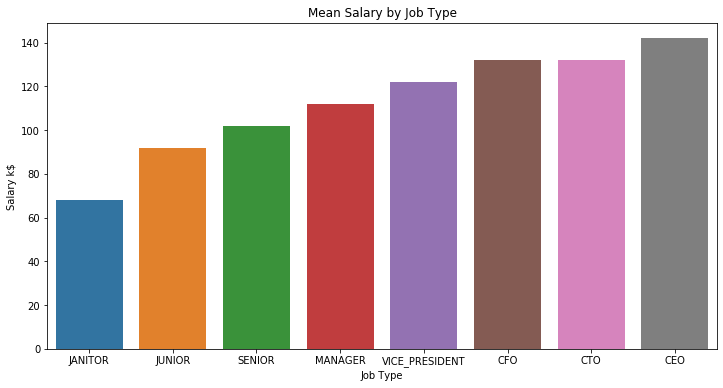

In [28]:
# Mean salary by Job Type Graph
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
sns.barplot(x='jobType', 
            y='salary',
            data=train_df.groupby(['jobType'])['salary'].median().reset_index().sort_values(by='salary'))
plt.title('Mean Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary k$')
plt.show()

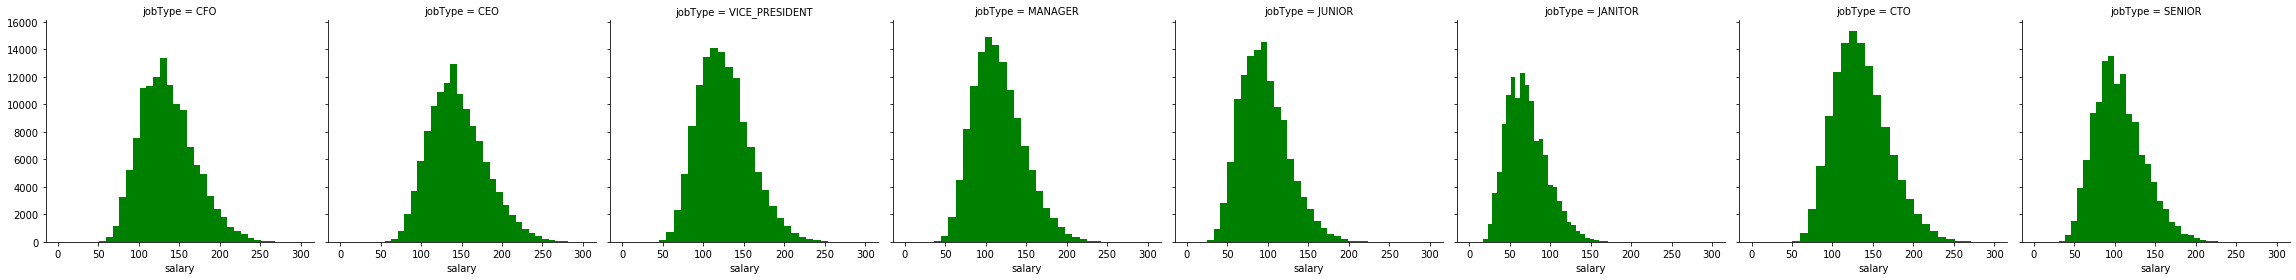

In [25]:
# Pay distribuition across Job Types
g = sns.FacetGrid(train_df, col='jobType', height=4)
g = g.map(plt.hist, 'salary', bins=30, color = 'green')

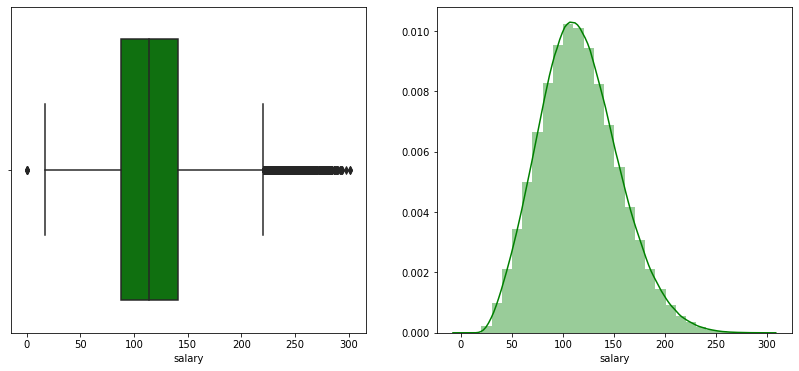

In [26]:
#Visualize Target Variable (Salary)
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary, color = 'green')
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=30, color= 'green')
plt.show()

- Salary information looks reasonable.  There does appear to be suspected outliers around 0 USD and also a long tail of salary observations that may be outliers above 225k USD.  A little more analysis is required to know how these outliers should be handled during model training.

<a id='examineoutliers'></a>
## Examine Outliers

In [27]:
#Apply IQR for outlier upper and lower bounds
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [28]:
#Check for potential outliers below the lower bound
train_df.loc[train_df.salary < 8.5, 'jobType'].value_counts()

JUNIOR            2
CTO               1
VICE_PRESIDENT    1
MANAGER           1
Name: jobType, dtype: int64

In [29]:
#Examine the records of the most suspicious outliers below the lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [30]:
#Check potential outliers above upper bound
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [32]:
#Examine the records of the most suspicious JUNIOR outliers above the salary upper bound
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


- I am not interested in volunteer/corrupt data with salaries of 0 USD, so these 5 records will be dropped from the model training set.  The upper bound outliers with salary > 220.5k seem reasonable based on their attributes.  There is a questionable 20 set of records with jobType='JUNIOR' and > 220.5k salary.  After further inspection, this seems reasonable based on their advanced degrees within high-paying industries.  

- High outliers (salary > 120.5k) will be kept in the training dataset.

- Low outliers (salary < 8.5k) will be removed

<a id='removeoutliers'></a>
## Remove Outliers

In [31]:
#Remove Low Outliers and zero salary records
train_df = train_df[train_df.salary > 8.5]

<a id='visualizefeatureimportance'></a>
## Visualize Feature Importance

In [32]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

### Check relationship between companyId and salary:

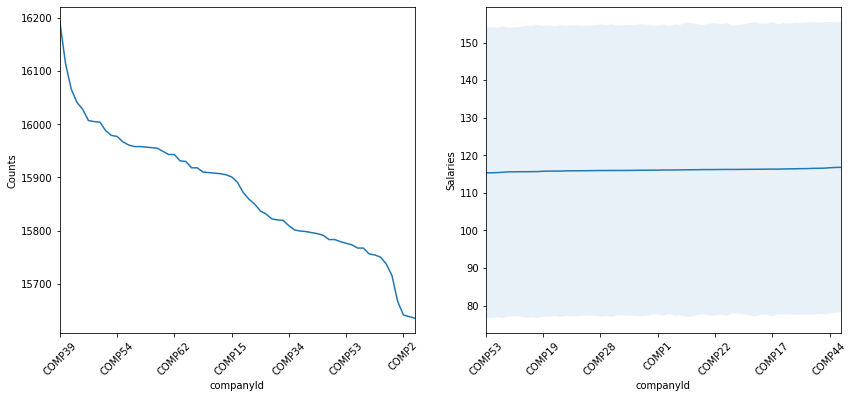

In [105]:
plot_feature(train_df.copy(), 'companyId')

- The flat horizontal line of the box plot indicates there is no correlation between companyId and salary.

### Check relationship between jobType and salary:

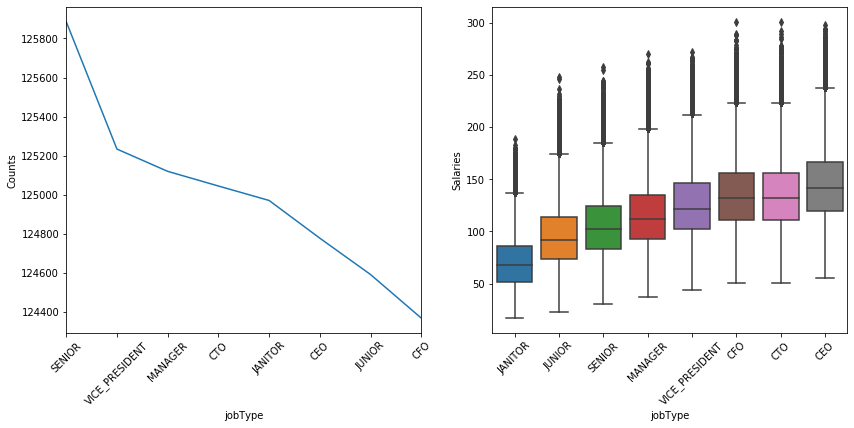

In [106]:
plot_feature(train_df.copy(), 'jobType')

- The rising linear trend on the box plot indicates positive correlation between jobType and salary.

### Check relationship between degree and salary:

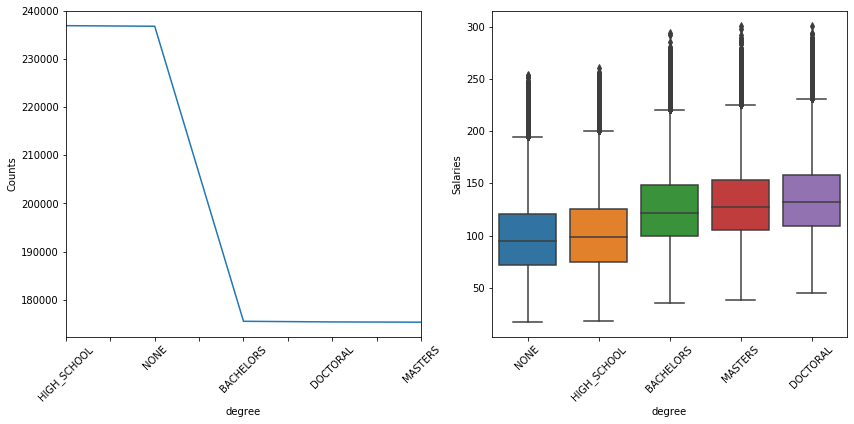

In [107]:
plot_feature(train_df.copy(), 'degree')

- There appears to be a significant bump in salary from HIGH_SCHOOL to BACHELORS.  There is also a slight rise among each of the levels of post-graduate degrees.  This makes sense that more advanced degrees tend to correspond to higher salaries.

### Check relationship between major and salary:

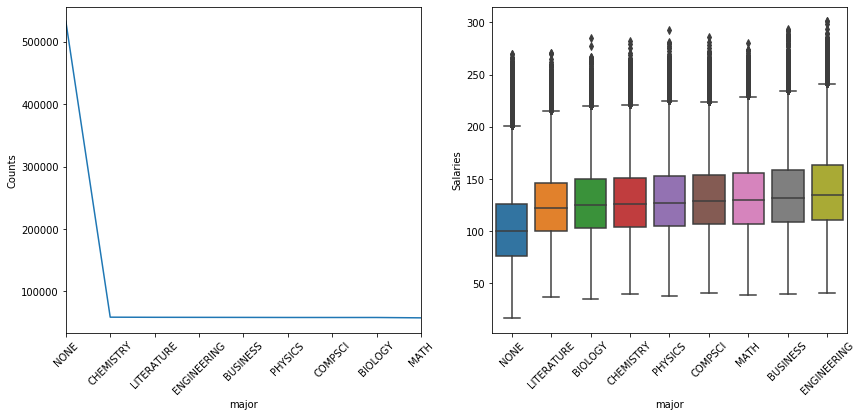

In [108]:
plot_feature(train_df.copy(), 'major')

- NONE most likely represents HIGH_SCHOOL graduates or missing data.  People with STEM majors generally make higher salaries, but information for major as a whole appears to be a weak indicator of salary.

### Check relationship between industry and salary:

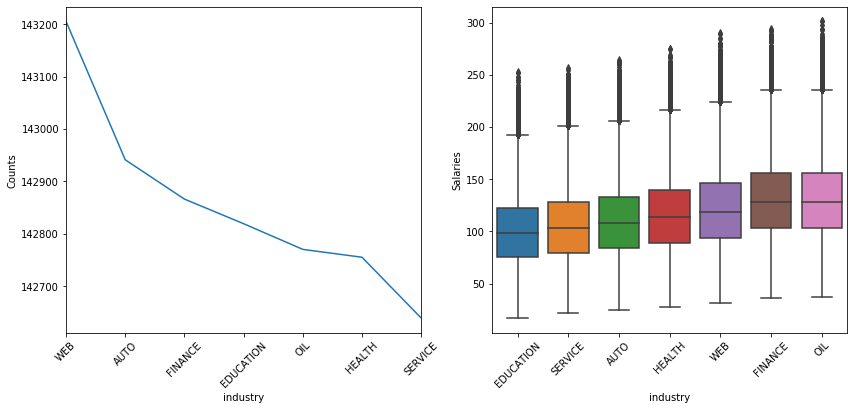

In [109]:
plot_feature(train_df.copy(), 'industry')

- There is a moderate linear rise in salary depending on industry.  The top 3 high-paying industries are clearly OIL, FINANCE and WEB.

### Check relationship between yearsExperience and salary:

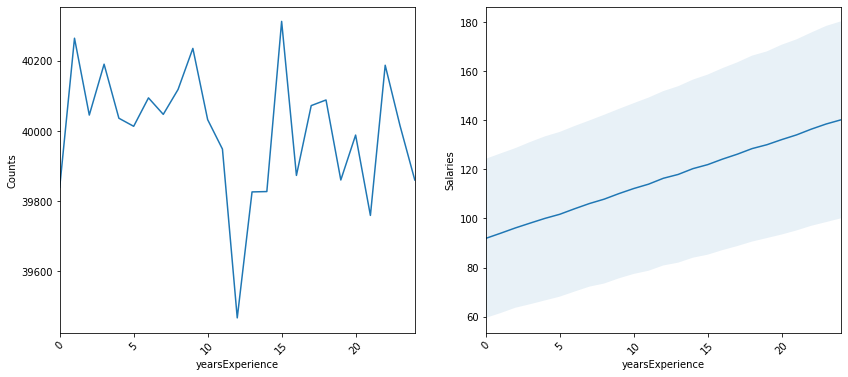

In [110]:
plot_feature(train_df.copy(), 'yearsExperience')

- In general, there is a strong positive linear relationship between yearsExperience and salary.

### Check relationship between milesFromMetropolis and salary:

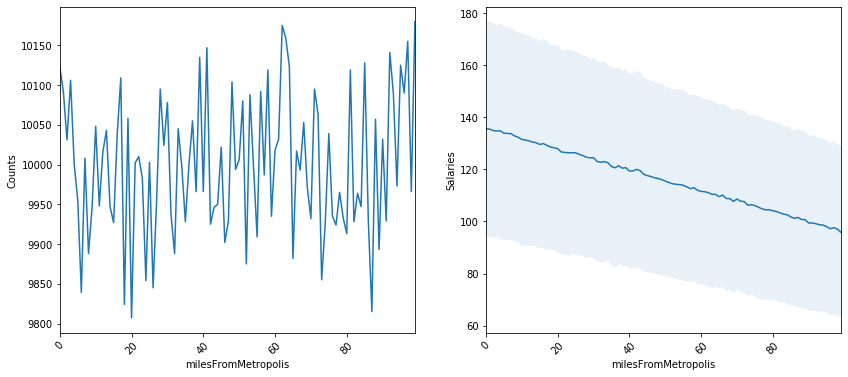

In [111]:
plot_feature(train_df.copy(), 'milesFromMetropolis')

- In general, there is a strong negative linear relationship between milesFromMetropolis and salary.  This makes sense, the farther from the city, the lower the cost of living and lower the salaries will be.

<a id='correlationmatrix'></a>
## Correlation Matrix

- For this visualization, I'm taking all of the categorical data and replacing the category with the mean.  This will treat all features numerical values and allow me to create a seaborn heatmap to see if there is correlation between my selected features and salary.  I probably won't apply this encoding to the final model, unless it proves to be a valuable move in feature engineering.

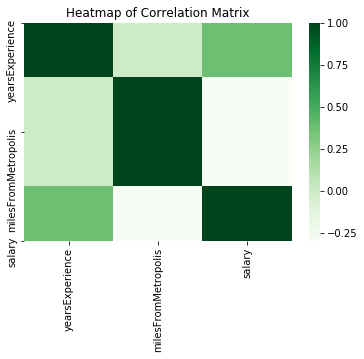

In [112]:
#Correlation Matrix
corr = train_df.corr()
corr = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="Greens")
plt.title('Heatmap of Correlation Matrix')
corr

In [113]:
# correlation between numeric variables
subset = train_df[['salary', 'yearsExperience', 'milesFromMetropolis']]
subset.corr()

,salary,yearsExperience,milesFromMetropolis
salary,1.000000,0.375013,-0.297686
yearsExperience,0.375013,1.000000,0.000672
milesFromMetropolis,-0.297686,0.000672,1.000000


In [114]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Conclusion:

<a id='finalthoughts'></a>
## Final Thoughts

- This EDA exercise offered valuable insights into the relationships between job posting features and salaries.  The data is clean with no missing values or duplicates.  At 1 million records, the size of this dataset should be large enough to handle multiple dimensions and help prevent over-fitting the model.  

#### Notes:

- Features likely to have a strong positive correlation to salary:  jobType, degree and yearsExperience.

- Features likely to have a strong negative correlation to salary:  milesFromMetropolis

- Features to be dropped from the training set:  outliers with salary < 8.5, jobId and companyId

## In the next Jupyter notebook, we will tune, select and benchmark our best ML model